# Tensorflow Model Perceptron
Author: Muhamad Ibnu Khaidar Hafiz

Kelompok 1 Algoritma Deep Learning

Kelas 4IA15

Anggota:
1. A IAS Falah Surya Gemilang (50421001)
2. Aldo Rizky Ramadhan (50421106)
3. Faiz Rizki Azmi (50421454)
4. Muhamad Ibnu Khaidar Hafiz (50421867)
5. Siti Asma Tomu (51421427)


## Import Tensorflow

In [1]:
import tensorflow as tf

2024-10-20 10:56:19.233921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 10:56:19.258711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 10:56:19.266172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 10:56:19.285398: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# cek versi tensorflow
tf.__version__

'2.17.0'

In [3]:
# cek device yang tersedia untuk tensorflow
tf.config.list_physical_devices()

I0000 00:00:1729421783.747957   36385 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729421783.760080   36385 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729421783.762287   36385 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Sun Oct 20 10:56:24 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P0             31W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Data Preprocessing

In [ ]:
# # install gdown untuk mendownload file dari google drive
# !pip install gdown

In [ ]:
# # download dataset dari google drive menggunakan gdown
# import gdown
# url = "https://drive.google.com/uc?id=1p8Flgeg-pd1pNdc4-KMO3vKlT8XLc1wt"
# output = "dataset.zip"
# gdown.download(url=url, output=output)

In [7]:
# # unzip dataset yang telah didownload
# import zipfile
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall("dataset")

In [8]:
# cek isi dari direktori dengan fungsi walk_through_dir
def walk_through_dir(dir_path):
    """
    Walks through dir_path and prints out its contents.

    Args:
        dir_path (str): target directory

    Prints:
        number of subdirectories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [9]:
# cek isi dari direktori dataset
import os
walk_through_dir('dataset/')

There are 2 directories and 0 images in 'dataset/'.
There are 9 directories and 0 images in 'dataset/test'.
There are 0 directories and 250 images in 'dataset/test/ice_cream'.
There are 0 directories and 250 images in 'dataset/test/hot_dog'.
There are 0 directories and 250 images in 'dataset/test/french_fries'.
There are 0 directories and 250 images in 'dataset/test/donuts'.
There are 0 directories and 250 images in 'dataset/test/steak'.
There are 0 directories and 250 images in 'dataset/test/ramen'.
There are 0 directories and 250 images in 'dataset/test/lasagna'.
There are 0 directories and 250 images in 'dataset/test/pizza'.
There are 0 directories and 250 images in 'dataset/test/sushi'.
There are 9 directories and 0 images in 'dataset/train'.
There are 0 directories and 750 images in 'dataset/train/ice_cream'.
There are 0 directories and 750 images in 'dataset/train/hot_dog'.
There are 0 directories and 750 images in 'dataset/train/french_fries'.
There are 0 directories and 750 ima

### Melihat contoh gambar dari dataset secara acak

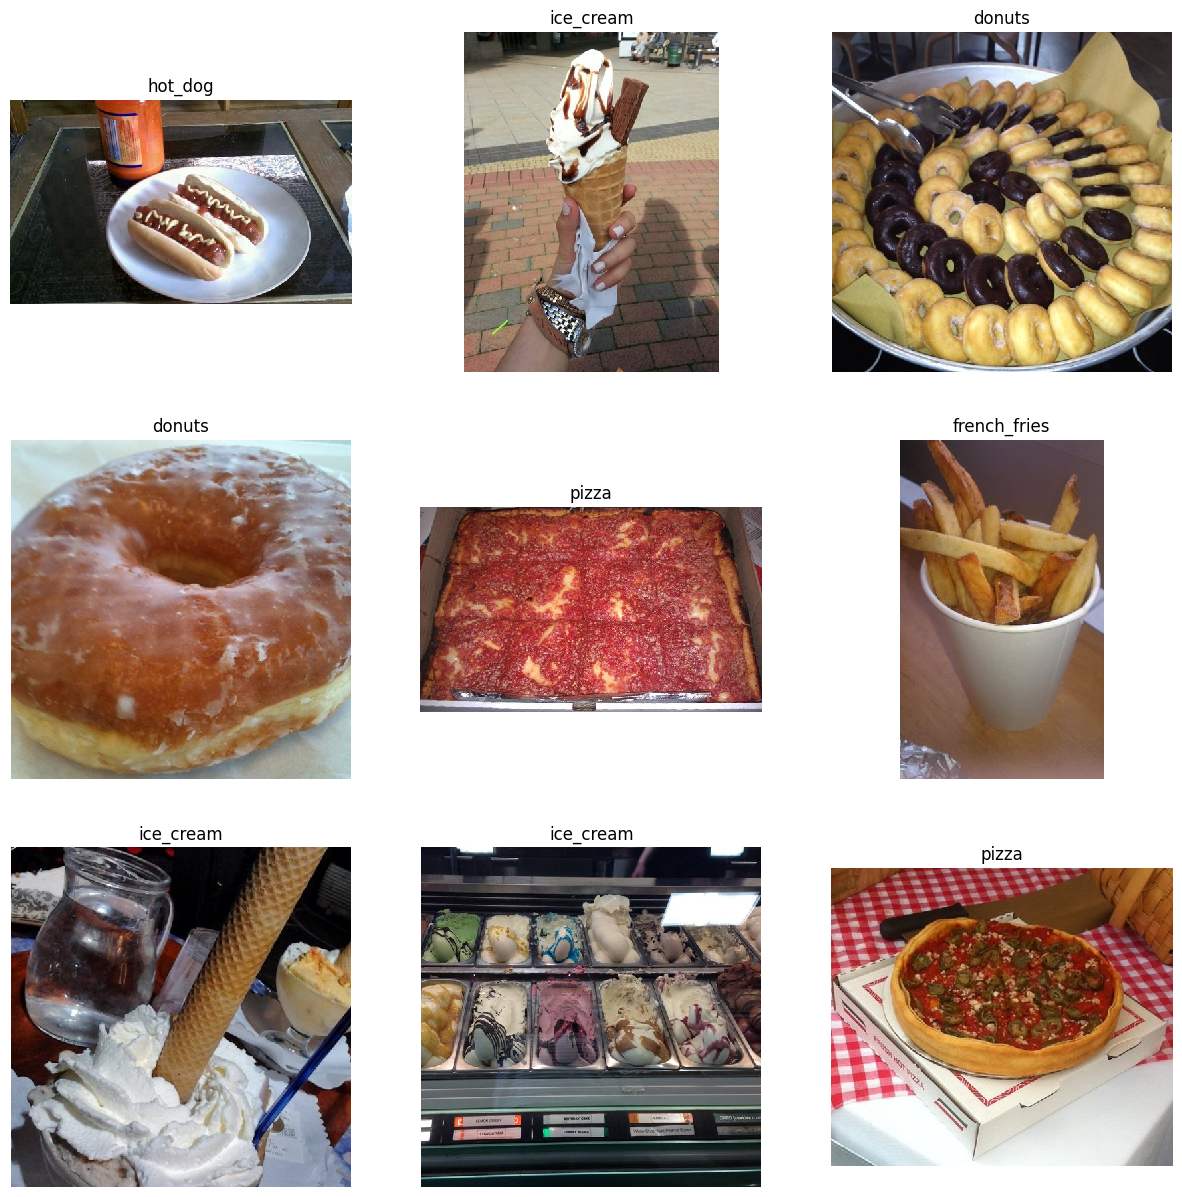

In [10]:
import random
from glob import glob
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

image_path = Path('dataset/')
train_dir = image_path / 'train'
test_dir = image_path / 'test'

image_path_list = list(image_path.glob('*/*/*.jpg'))

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        img_path = random.choice(image_path_list)
        image_class = img_path.parent.stem
        
        img = plt.imread(img_path)
        ax[j, i].imshow(img, interpolation='none')
        ax[j, i].axis('off')
        ax[j, i].set_title(image_class)
        
plt.show()

### Load Dataset

In [11]:
# Buat hyperparameter batch_size, img_height, dan img_width
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [12]:
# Buat dataset menggunakan tf.keras.utils.image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 6750 files belonging to 9 classes.


I0000 00:00:1729421787.646457   36385 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729421787.649064   36385 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729421787.651064   36385 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729421787.968747   36385 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 2250 files belonging to 9 classes.


In [13]:
# cek class names
class_names = train_dataset.class_names
class_names

['donuts',
 'french_fries',
 'hot_dog',
 'ice_cream',
 'lasagna',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
num_classes = len(class_names)
num_classes

9

In [15]:
# gunakan autotune untuk mempercepat proses loading dataset, karena dataset ini ada banyak sekali gambarnya
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Image Augmentation

In [16]:
image_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomFlip('vertical'),
])

## Model Perceptron

Menggunakan arsitektur dari VGG19

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
model = Sequential([
    Input(shape=(224, 224, 3)),
    image_augmentation,
    
    # Bagian 1
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 5
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian FC
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    # Output layer berupa 9 buah neuron yang merepresentasikan 9 kelas yang ada
    Dense(num_classes, activation='softmax')
])

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [20]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [21]:
# create callback untuk menghentikan training jika akurasi sudah mencapai 95%
class callback_ibnu(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True
            
callback = callback_ibnu()

In [22]:
# cek model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,31

 Total params: 139,607,113 (532.56 MB)

 Trainable params: 139,607,113 (532.56 MB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [23]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=1000,
    callbacks=[callback],
    verbose=1
)

Epoch 1/1000


I0000 00:00:1729421821.343621   36577 service.cc:146] XLA service 0x7f0a6001dea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729421821.343670   36577 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-10-20 10:57:01.489533: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 10:57:02.179881: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904
E0000 00:00:1729421845.965244   36577 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729421846.168181   36577 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:172

210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.1099 - loss: 2.1976

E0000 00:00:1729422020.130427   36582 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729422020.328799   36582 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729422021.428961   36582 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729422021.604429   36582 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729422023.881433   36582 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.1099 - loss: 2.1976